In [1]:
# load packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import platform
if platform.system() == "Windows":
    plt.rcParams['font.family'] = ['SimHei'] # Windows
elif platform.system() == "Darwin":
    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # MacOS
plt.rcParams['axes.unicode_minus']=False 

df = pd.read_csv("../data/repositories_merged.csv")

In [2]:
data = df.copy()

C:\Users\lac04\AppData\Local\Temp\ipykernel_8144\1187142174.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  similar_projects['group'] = '小体量/低知名度项目'


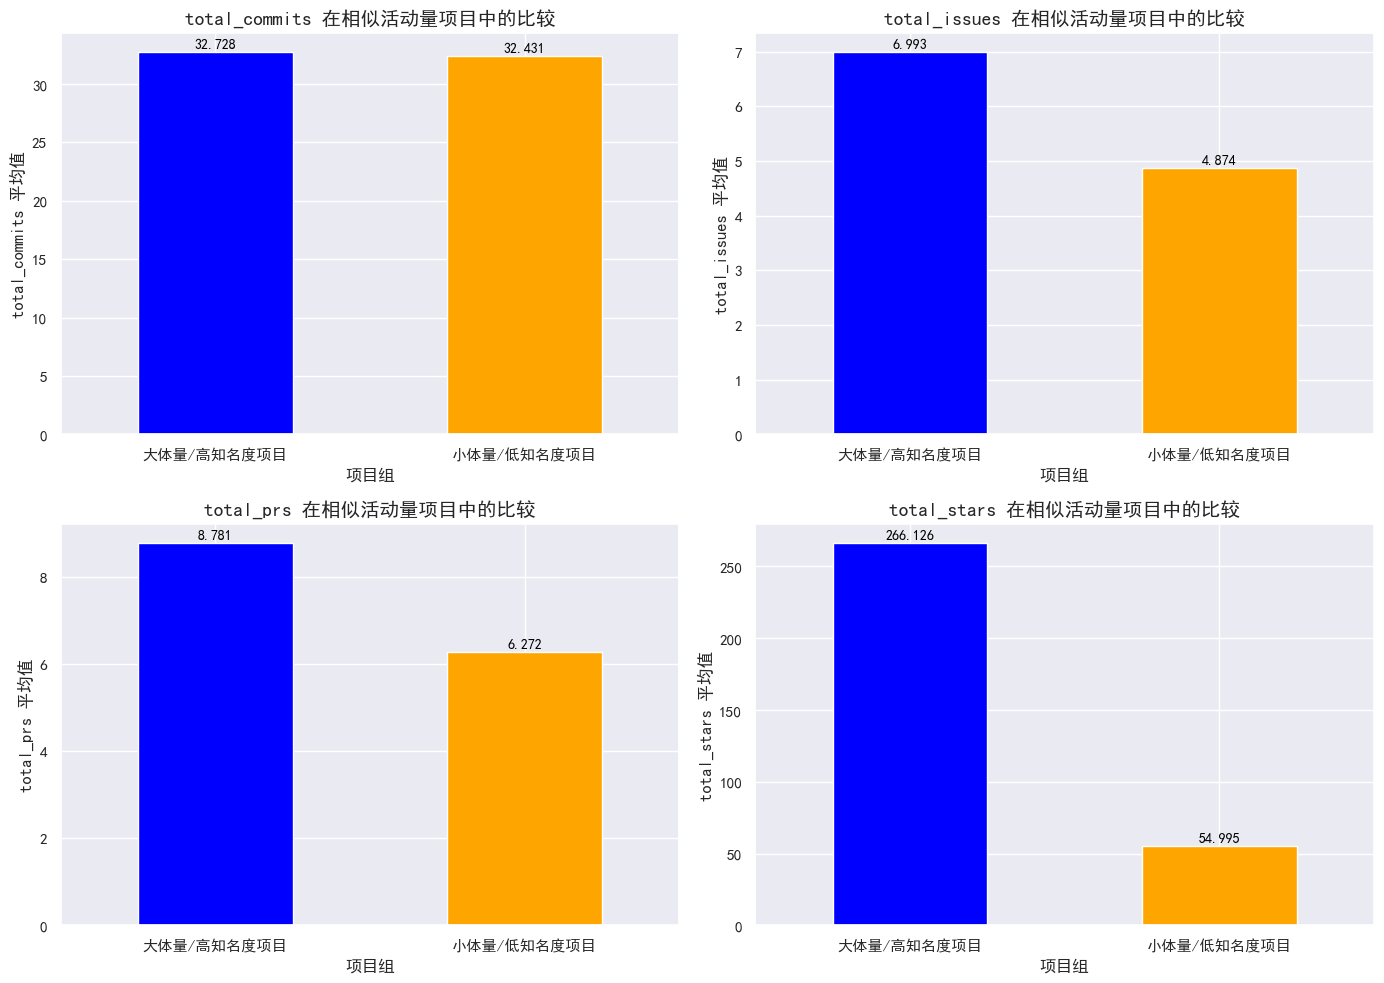

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 假设数据已加载到data变量中

# 首先选择基于 total_commits 和 total_issues 的欧氏距离度量，找到活动量相近的项目
def compute_activity_distance(row, median_commits, median_issues):
    # 使用欧氏距离来计算与中位数的距离
    return np.sqrt((row['total_commits'] - median_commits)**2 + (row['total_issues'] - median_issues)**2)

# 计算中位数
median_commits = data['total_commits'].median()
median_issues = data['total_issues'].median()

# 计算每个项目的距离
data['activity_distance'] = data.apply(lambda row: compute_activity_distance(row, median_commits, median_issues), axis=1)

# 设定一个距离阈值（如上 10%）
threshold_distance = data['activity_distance'].quantile(0.1)

# 筛选出距离在阈值内的项目
similar_projects = data[data['activity_distance'] <= threshold_distance]

# 根据 stargazerCount 来区分体量和知名度不同的项目
threshold_stars = data['stargazerCount'].median()

# 初始化组别为“小体量/低知名度项目”
similar_projects['group'] = '小体量/低知名度项目'
similar_projects.loc[similar_projects['stargazerCount'] > threshold_stars, 'group'] = '大体量/高知名度项目'

# 定义健康度指标
metrics = ['total_commits', 'total_issues', 'total_prs', 'total_stars']

# 使用子图绘制大体量与小体量项目在健康度上的比较
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    ax = axes[i]
    
    # 计算每个组的健康度平均值
    group_means = similar_projects.groupby('group')[metric].mean()
    group_means.plot(kind='bar', ax=ax, color=['blue', 'orange'])
    
    # 在柱状图上标记数值，保留三位小数
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 3), textcoords='offset points')

    # 设置子图的标题和标签
    ax.set_title(f'{metric} 在相似活动量项目中的比较', fontsize=14)
    ax.set_ylabel(f'{metric} 平均值', fontsize=12)
    ax.set_xlabel('项目组', fontsize=12)
    
    # 设置x轴标签角度为0
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# 调整子图布局
plt.tight_layout()
plt.savefig('../images/feature_importance/project_health_comparison.png', dpi=300, format='png')
plt.show()

In [4]:
data

,nameWithOwner,stargazerCount,isArchived,primaryLanguage,total_lifetime,active_lifetime,total_commits,total_issues,total_prs,total_stars,total_tags,total_comments,average_commits,average_issues,average_prs,average_stars,average_tags,average_comments,activity_distance
0,goincrypto/cryptocom-exchange,63,False,Python,1452,1238,521,23,22,69,25,58,0.358815,0.015840,0.015152,0.047521,0.017218,0.039945,487.262763
1,shaofengzeng/SuperPoint-Pytorch,105,False,Python,805,607,140,28,1,121,0,102,0.173913,0.034783,0.001242,0.150311,0.000000,0.126708,108.060168
2,HAOLI-TUKL/Multi_Robots_DMPC,50,False,C++,1188,987,65,3,0,57,0,0,0.054714,0.002525,0.000000,0.047980,0.000000,0.000000,31.256999
3,graphql-compose/graphql-compose-json,64,False,TypeScript,2248,1582,61,5,49,65,21,55,0.027135,0.002224,0.021797,0.028915,0.009342,0.024466,27.073973
4,mcuadros/go-rpi-rgb-led-matrix,75,False,Go,2625,2413,37,12,6,82,0,24,0.014095,0.004571,0.002286,0.031238,0.000000,0.009143,5.830952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96482,zzVertigo/XboxLive.Server,43,True,C#,1685,1453,35,1,1,48,0,1,0.020772,0.000593,0.000593,0.028487,0.000000,0.000593,6.082763
96483,zzjoey/Leava,97,True,JavaScript,2268,2050,8,1,0,42,0,10,0.003527,0.000441,0.000000,0.018519,0.000000,0.004409,26.683328
96484,zzswang/docker-nginx-react,58,True,Shell,2666,2437,65,12,20,59,18,16,0.024381,0.004501,0.007502,0.022131,0.006752,0.006002,31.400637
96485,zzurio/Anti-Dump,50,True,Java,881,670,5,0,1,55,0,3,0.005675,0.000000,0.001135,0.062429,0.000000,0.003405,29.832868


In [7]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()

df['primaryLanguage'] = lbe.fit_transform(df['primaryLanguage'])
df['isArchived'] = df['isArchived'].astype(int)

In [8]:
features = ['stargazerCount', 'isArchived', 'primaryLanguage',
       'total_commits', 'total_issues',
       'total_prs', 'total_stars', 'total_tags', 'total_comments',
       'average_commits', 'average_issues', 'average_prs', 'average_stars',
       'average_tags', 'average_comments']

target = 'active_lifetime'

### 特征重要性分析

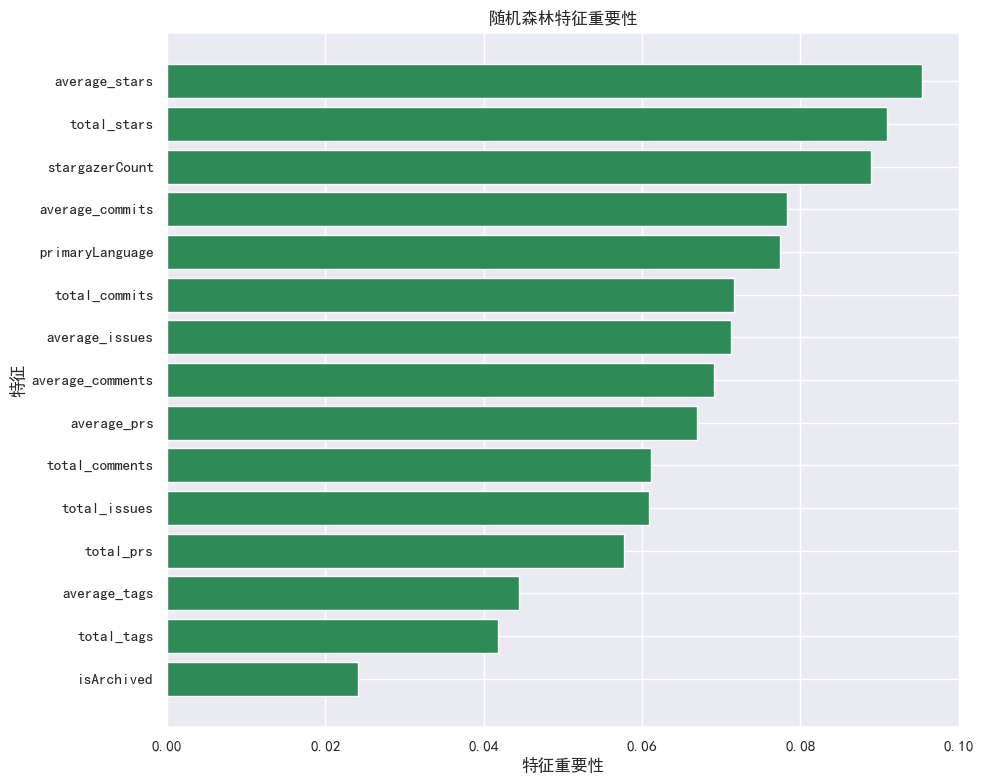

D:\Anaconda 3\envs\lacpytorch\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


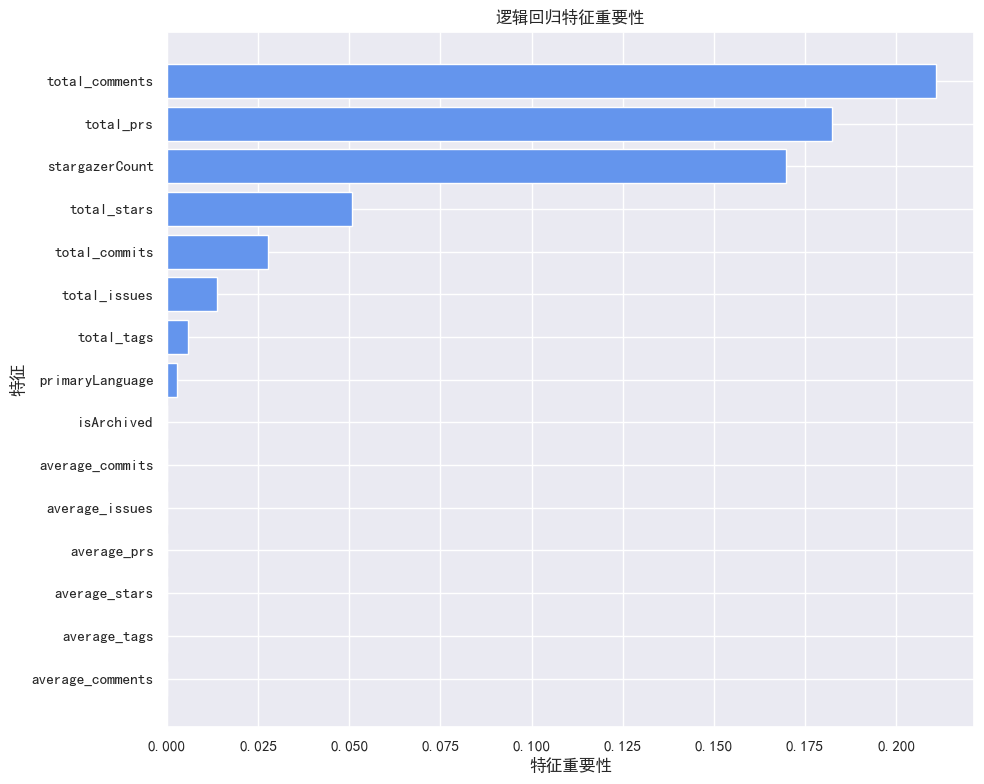

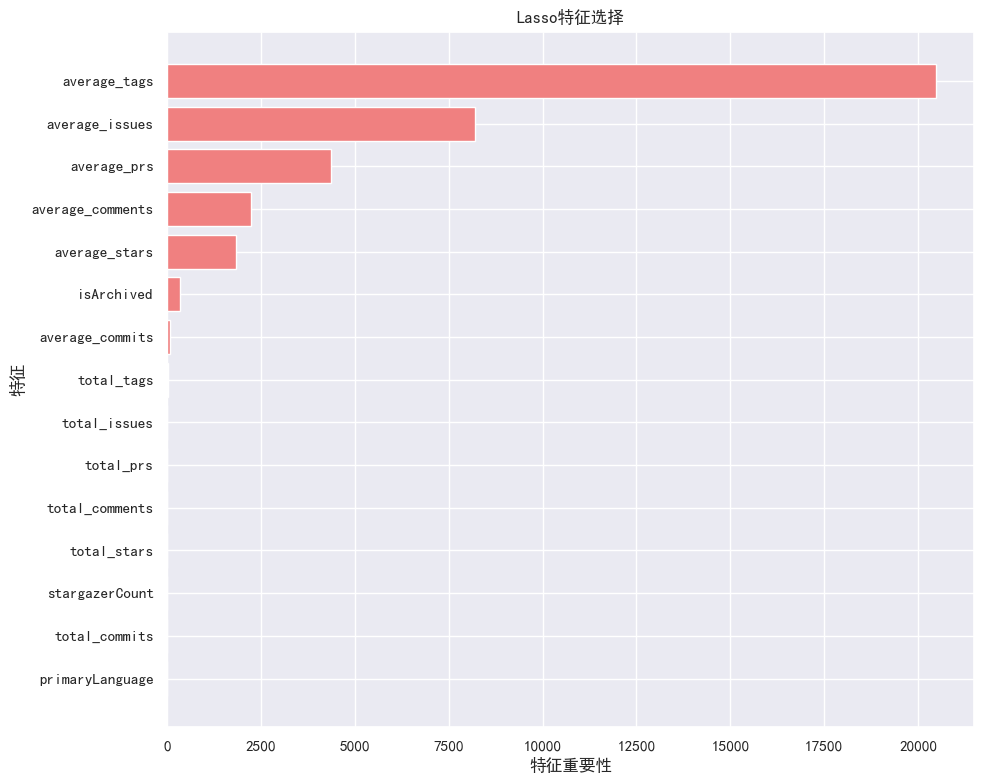

选定的特征 (RFE): ['stargazerCount' 'primaryLanguage' 'total_commits' 'total_stars'
 'total_comments' 'average_commits' 'average_issues' 'average_prs'
 'average_stars' 'average_comments']
基于方差选择的特征: ['stargazerCount' 'isArchived' 'primaryLanguage' 'total_commits'
 'total_issues' 'total_prs' 'total_stars' 'total_tags' 'total_comments'
 'average_commits' 'average_stars' 'average_comments']


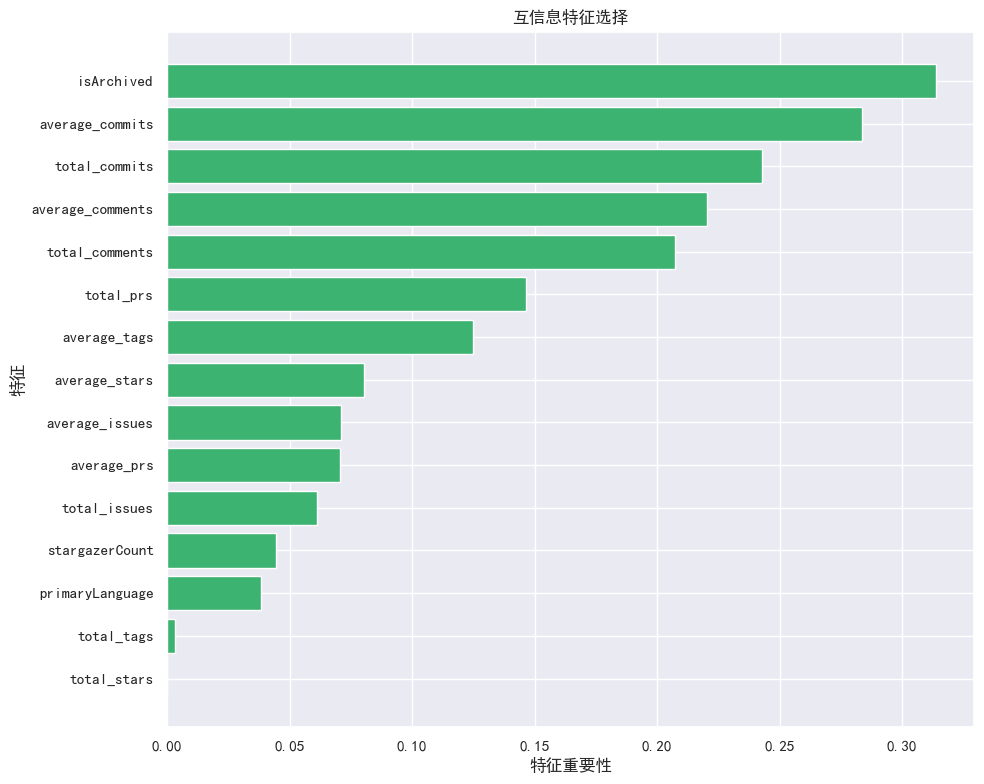

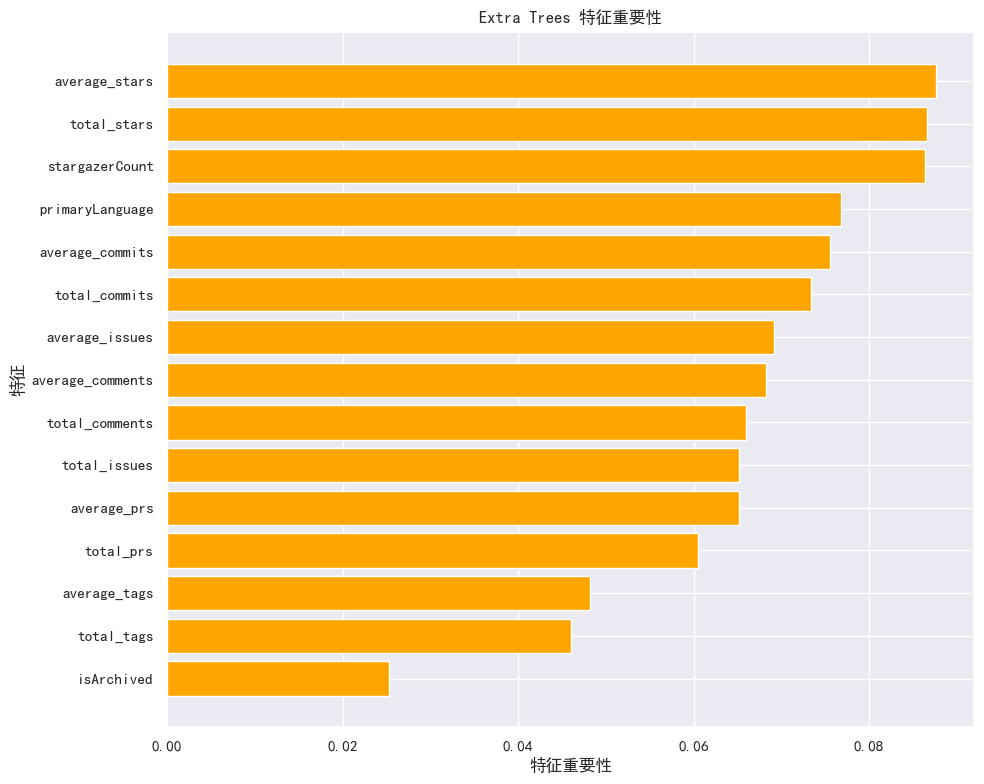

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_selection import (
    mutual_info_classif,
    RFE,
    VarianceThreshold
)
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression, Lasso

df_sample = df.sample(n=1000, random_state=42)

X = df_sample[features].astype(float)
y = df_sample[target]

feature_importances = {}

# 1. 随机森林特征重要性
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
feature_importances['随机森林'] = rf.feature_importances_

rf_df = pd.DataFrame({
    '特征': features,
    '重要性': feature_importances['随机森林']
}).sort_values(by='重要性', ascending=False).head(50)

plt.figure(figsize=(10, 8))
plt.barh(rf_df['特征'], rf_df['重要性'], color='seagreen')
plt.xlabel('特征重要性')
plt.ylabel('特征')
plt.title('随机森林特征重要性')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("../images/feature_importance/random_forest_importance.jpg", dpi=500)
plt.show()

# 2. 逻辑回归特征重要性
lr = LogisticRegression(solver='liblinear', penalty='l1', random_state=42)
lr.fit(X, y)
feature_importances['逻辑回归'] = lr.coef_[0]

lr_df = pd.DataFrame({
    '特征': features,
    '重要性': np.abs(feature_importances['逻辑回归'])  # 取绝对值
}).sort_values(by='重要性', ascending=False).head(50)

plt.figure(figsize=(10, 8))
plt.barh(lr_df['特征'], lr_df['重要性'], color='cornflowerblue')
plt.xlabel('特征重要性')
plt.ylabel('特征')
plt.title('逻辑回归特征重要性')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("../images/feature_importance/logistic_regression_importance.jpg", dpi=500)
plt.show()

# 3. Lasso回归特征选择
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X, y)
feature_importances['Lasso'] = np.abs(lasso.coef_)

lasso_df = pd.DataFrame({
    '特征': features,
    '重要性': feature_importances['Lasso']
}).sort_values(by='重要性', ascending=False).head(50)

plt.figure(figsize=(10, 8))
plt.barh(lasso_df['特征'], lasso_df['重要性'], color='lightcoral')
plt.xlabel('特征重要性')
plt.ylabel('特征')
plt.title('Lasso特征选择')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("../images/feature_importance/lasso_importance.jpg", dpi=500)
plt.show()

# 4. 递归特征消除 (RFE)
rfe = RFE(estimator=RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=10)
rfe.fit(X, y)
selected_features_rfe = np.array(features)[rfe.support_]

print("选定的特征 (RFE):", selected_features_rfe)

# 5. 基于方差的特征选择
vt = VarianceThreshold(threshold=0.1)
vt.fit(X)
selected_features_variance = np.array(features)[vt.get_support()]

print("基于方差选择的特征:", selected_features_variance)

# 6. 互信息特征选择
mutual_info = mutual_info_classif(X, y)
feature_importances['互信息'] = mutual_info

mi_df = pd.DataFrame({
    '特征': features,
    '重要性': feature_importances['互信息']
}).sort_values(by='重要性', ascending=False).head(50)

plt.figure(figsize=(10, 8))
plt.barh(mi_df['特征'], mi_df['重要性'], color='mediumseagreen')
plt.xlabel('特征重要性')
plt.ylabel('特征')
plt.title('互信息特征选择')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("../images/feature_importance/mutual_information_importance.jpg", dpi=500)
plt.show()


# 7.Extra Trees 特征重要性 (Extra Trees Feature Importance)
et = ExtraTreesClassifier(n_estimators=100, random_state=42)
et.fit(X, y)
feature_importances['Extra Trees'] = et.feature_importances_

et_df = pd.DataFrame({
    '特征': features,
    '重要性': feature_importances['Extra Trees']
}).sort_values(by='重要性', ascending=False).head(50)

plt.figure(figsize=(10, 8))
plt.barh(et_df['特征'], et_df['重要性'], color='orange')
plt.xlabel('特征重要性')
plt.ylabel('特征')
plt.title('Extra Trees 特征重要性')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("../images/feature_importance/extra_trees_importance.jpg", dpi=500)
plt.show()

### 基于遗传算法优化的传统机器学习模型

In [10]:
from sklearn.preprocessing import StandardScaler
# 从数据集中随机抽样1000行，以加快计算速度
df_sample = df.sample(3000)

# 定义特征矩阵 X 和目标向量 y
X = df_sample[features].astype(float)
y = df_sample[target]

scaler = StandardScaler()
X = pd.DataFrame(
	scaler.fit_transform(X),columns=X.columns
)
## train test split 80%/20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
													test_size=0.20,random_state=50,shuffle=True)


In [11]:
from sklearn_genetic import GASearchCV
from sklearn_genetic.space import Categorical, Integer, Continuous
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

# make params grid
Model_params = {
	DecisionTreeRegressor:{
		'max_depth': Integer(3,30),
		'min_samples_split':Integer(5,30)
	},
	
	
	RandomForestRegressor:{
			'n_estimators': Integer(10, 400),  # 表示取值范围为10至250
			'min_samples_split': Integer(3, 25),
			'max_depth': Integer(1, 30)
	},

	XGBRegressor:{
		'n_estimators': Integer(10,400),
		'max_depth': Integer(4,30),
		'max_leaves': Integer(2,30)
	},

	KNeighborsRegressor:{
		'n_neighbors':Integer(5,30),
		'leaf_size':Integer(20,40)

	},
	MLPRegressor:{
		'learning_rate_init': Continuous(1e-3, 1e+1, distribution='log-uniform'),
		'hidden_layer_sizes': Integer(10, 400),
		'max_iter':Categorical([1000])
	}
}
############## regression model enda


def GA_opt(Model,param_grid,X,y,scoring,criteria):
	# The main class from sklearn-genetic-opt
	evolved_estimator = GASearchCV(estimator=Model(),
								cv= KFold(n_splits=3, shuffle=True),  #KFold if regression
								scoring=scoring,
								param_grid=param_grid,
								n_jobs=-1,
								generations=5,
								criteria=criteria, #the max the better or the min the better
								verbose=True)
	# Train and optimize the estimator
	evolved_estimator.fit(X, y)
	return evolved_estimator,evolved_estimator.best_params_,evolved_estimator.best_score_


import numpy as np

# 从 X_train 和 y_train 中随机选择部分数据调参
random_indices = np.random.choice(len(X_train), 400, replace=False)
X_train_sample = X_train.iloc[random_indices]
y_train_sample = y_train.iloc[random_indices]

best_params_dic = {}
# best models are the models with best params
best_models = []
for Model,params in Model_params.items():
	print(f"Genetic Algorithm optimizing: {Model.__name__}")
	# run optimization
	evolved_estimator,best_params_,best_score_ = GA_opt(Model,params, X_train_sample, y_train_sample, 'r2', 'max')
	print(f'best param: {best_params_}\n')
	best_params_dic[Model] = dict(best_params_)
	best_models.append(Model(**dict(best_params_)))

Genetic Algorithm optimizing: DecisionTreeRegressor
gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	50    	0.267972	0.061342   	0.408731   	0.130778   
1  	100   	0.316615	0.0506941  	0.427852   	0.204412   
2  	100   	0.341629	0.0482526  	0.427852   	0.231966   
3  	100   	0.347502	0.0338569  	0.427852   	0.243553   
4  	100   	0.366379	0.0328066  	0.440079   	0.262548   
5  	100   	0.363417	0.0370448  	0.440079   	0.272033   
best param: {'max_depth': 20, 'min_samples_split': 16}

Genetic Algorithm optimizing: RandomForestRegressor
gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	50    	0.521198	0.108958   	0.641816   	0.122277   
1  	100   	0.598255	0.040911   	0.658465   	0.498816   
2  	100   	0.629325	0.0192116  	0.657284   	0.572069   
3  	100   	0.638072	0.0157791  	0.671483   	0.604718   
4  	100   	0.639096	0.0131746  	0.657284   	0.598962   
5  	100   	0.646394	0.00962548 	0.663324   	0.622885   
best param: {'n_estimators': 390, 'min_samples_split': 3

In [12]:

## train test split 80%/20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
													test_size=0.20,random_state=50,shuffle=True)


import warnings
warnings.filterwarnings('ignore')
# 定义模型性能评估方法
def evaluation(model=None,y_test=None,y_pred=None,model_type=None):
	"""
	传入模型，真实值y_test和预测值y_pred，评估模型效果
	model_type = regression评估回归模型
	model_type = classification评估分类模型
	"""
	if model!=None:
		y_pred = model.predict(X_test)
	# check if onehot encoded:
	if len(y_pred.shape) == 2:
		y_pred = y_pred.argmax(axis=1)
	if len(y_test.shape) == 2:
		y_test = y_test.argmax(axis=1)

	metrics = {}
	# if classification model
	if model_type == 'classification':
		from sklearn.metrics import classification_report
		from sklearn.metrics import accuracy_score   #正确率
		from sklearn.metrics import precision_score	#精准率
		from sklearn.metrics import recall_score	  #召回率
		from sklearn.metrics import f1_score		 #调和平均值F1
		# metrics['cls_report'] = classification_report(y_test, y_pred)
		metrics['accuracy'] = accuracy_score(y_test,y_pred)
		metrics['precision'] =  precision_score(y_test,y_pred,average='macro')
		metrics['recall'] = recall_score(y_test,y_pred,average='macro')
		metrics['f1-score'] = f1_score(y_test,y_pred,average='macro')
		
	# if regression model
	elif model_type== 'regression':
		from sklearn.metrics import mean_squared_error
		from sklearn.metrics import mean_absolute_error
		from sklearn.metrics import r2_score
		metrics['MSE'] = mean_squared_error(y_test,y_pred)
		metrics['RMSE'] = mean_squared_error(y_test,y_pred) ** 0.5
		metrics['MAE'] = mean_absolute_error(y_test,y_pred)
		metrics['R2'] = r2_score(y_test,y_pred)
	else:
		raise Exception('model_type should be classification or regression!')
	return metrics


def model_train(model, X_train, y_train, X_test=None, y_test=None, model_type=None):
    import time
    time_start = time.time()
    model.fit(X_train, y_train)
    time_end = time.time()
    time_cost = time_end - time_start
    print(f"- training {type(model).__name__}, time cost: {time_cost:.6f} seconds")
    metrics_test = None
    metrics_train = None
    if X_test is not None:
        y_pred_test = model.predict(X_test)
        metrics_test = evaluation(y_test=y_test, y_pred = y_pred_test, model_type=model_type)
        y_pred_train = model.predict(X_train)
        metrics_train = evaluation(y_test=y_train, y_pred= y_pred_train, model_type=model_type)
    return model, metrics_train, metrics_test



models_untrained = best_models.copy()

model_type = 'regression'
eval_dic = {}
eval_dic_train = {} # 新增一个字典用于存储训练集的评估结果
models = []
# 依次训练
for model_untrained in models_untrained:
	model_name = type(model_untrained).__name__
	print(f"【{model_name}】")
	model, metrics_train, metrics_test = model_train(model_untrained, X_train, y_train, X_test=X_test, y_test=y_test, model_type=model_type)
	models.append(model)
	# 得到测试集评估结果
	eval_dic[model_name] = metrics_test.copy()
	# 得到训练集评估结果
	eval_dic_train[model_name] = metrics_train.copy()

	print(f"- Params：{model.get_params()}")
	print("Evaluation on Training Data:")
	print(metrics_train)
	print("Evaluation on Test Data:")
	print(metrics_test)
	print('\n')

【DecisionTreeRegressor】
- training DecisionTreeRegressor, time cost: 0.025690 seconds
- Params：{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 20, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 16, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Evaluation on Training Data:
{'MSE': 82003.39590736694, 'RMSE': 286.36235071560463, 'MAE': 186.4905488978614, 'R2': 0.9329289409304987}
Evaluation on Test Data:
{'MSE': 229966.86363812158, 'RMSE': 479.54860404146893, 'MAE': 305.99169963832463, 'R2': 0.814216226511338}


【RandomForestRegressor】
- training RandomForestRegressor, time cost: 9.452666 seconds
- Params：{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 15, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0, 'n_estimators

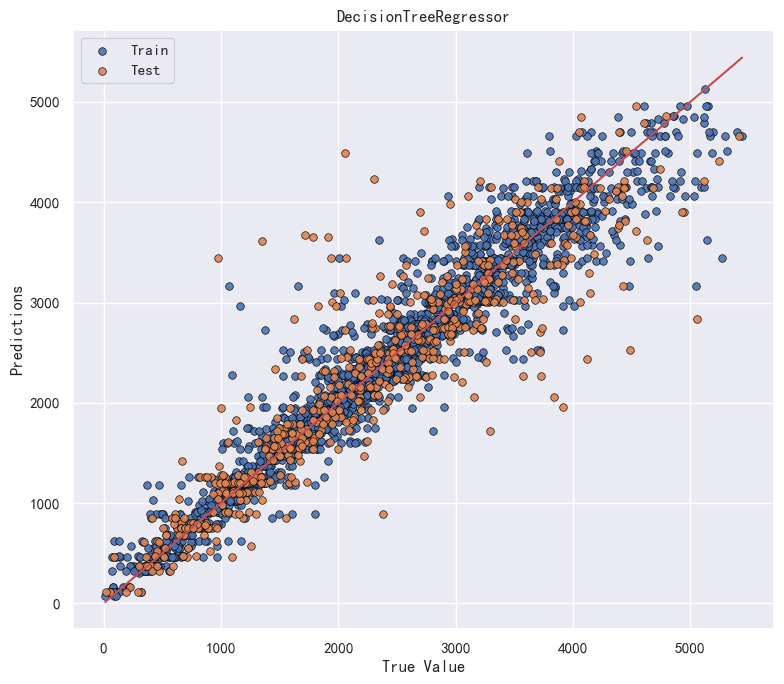

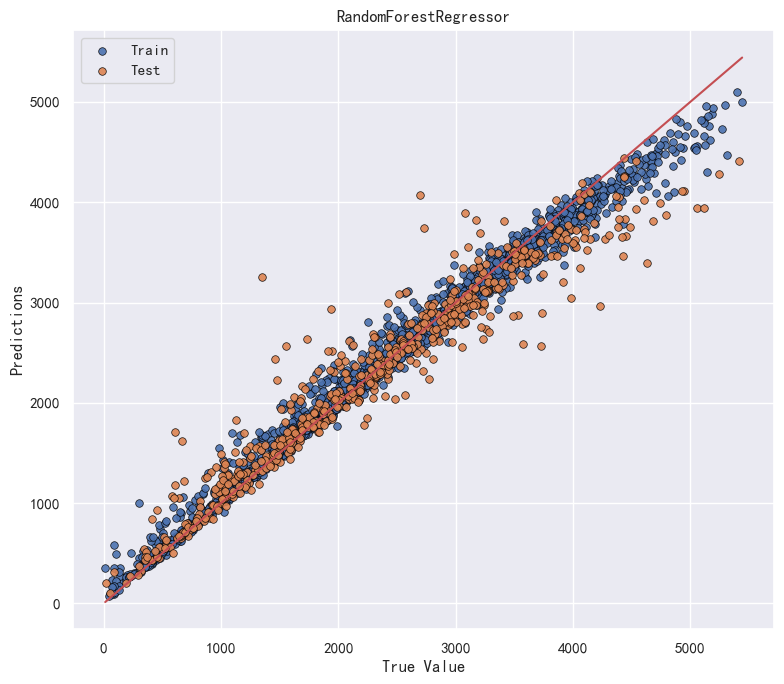

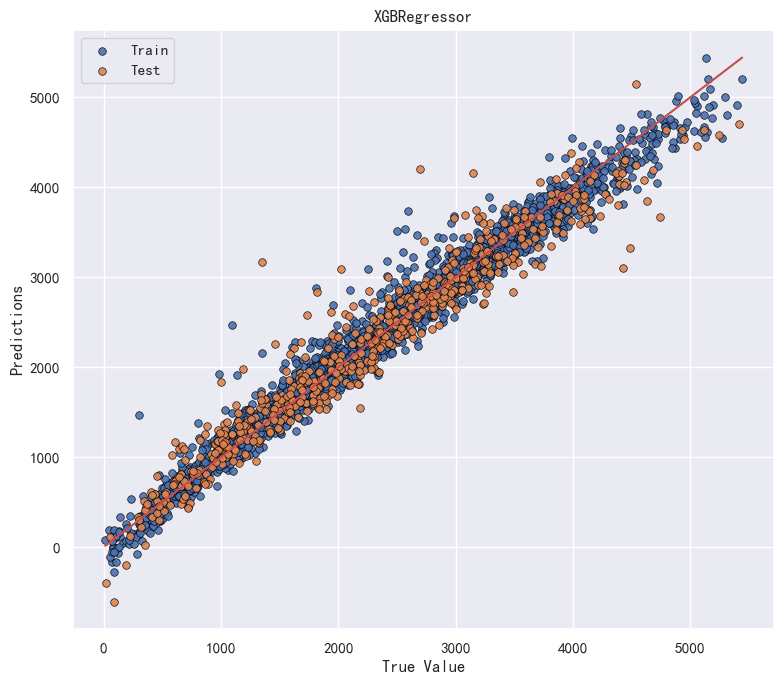

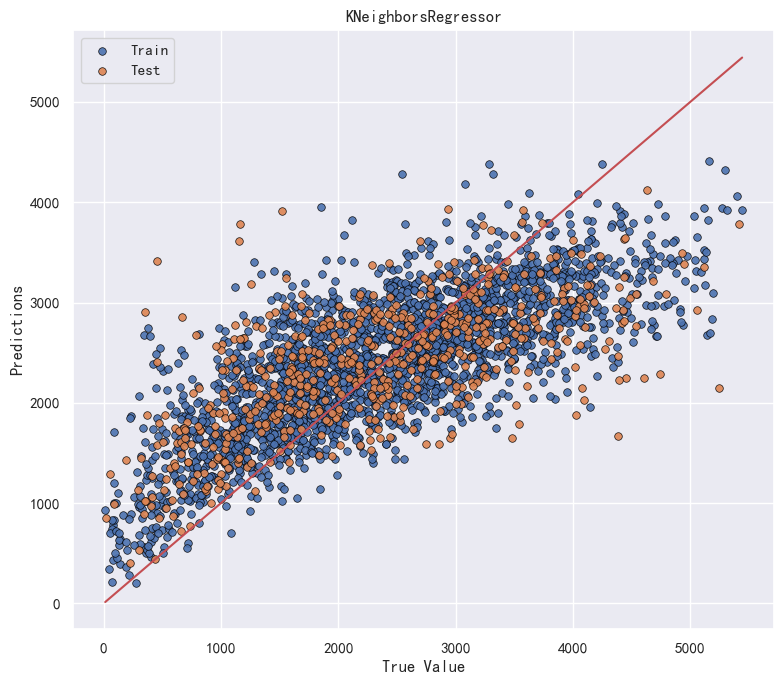

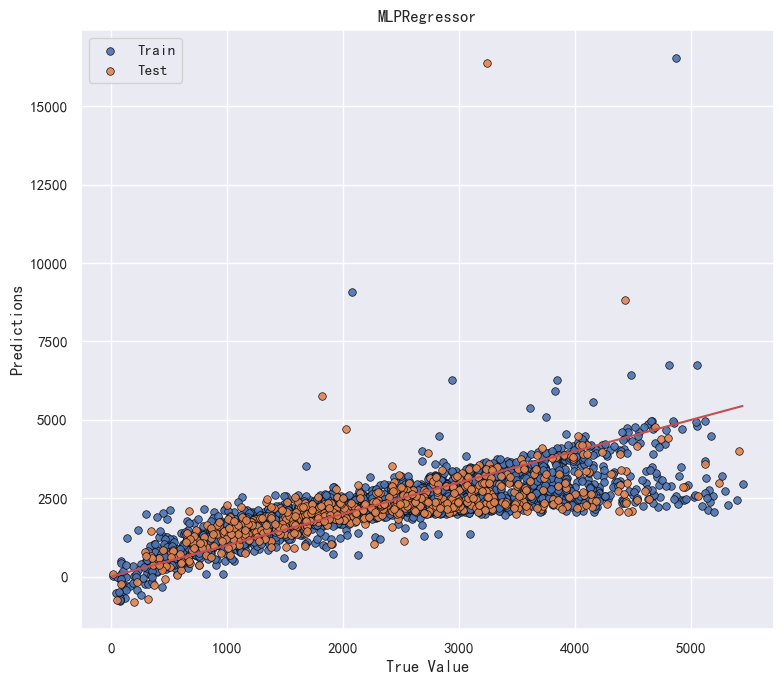

In [13]:
def scatterplot_comparison(model=None,X_test=None,y_test=[],y_pred_test=[],X_train=None,y_train=[],y_pred_train=[]):
	"""define a function that plots comparison in scatter"""
	if model is not None:
		if X_test is not None:
			y_pred_test = model.predict(X_test)
		if X_train is not None:
			y_pred_train = model.predict(X_train)
	# change to list
	y_train = list(y_train)
	y_test = list(y_test)
	y_pred_train = list(y_pred_train)
	y_pred_test = list(y_pred_test)
	# plot
	plt.figure(figsize=(8,7))
	if len(y_train)>0:
		plt.scatter(y_train,y_pred_train,label='Train',marker='o',s=30,edgecolors='black',linewidths=0.5,alpha=0.9)
	if len(y_test)>0:
		plt.scatter(y_test,y_pred_test,label='Test',marker='o',s=30,edgecolors='black',linewidths=0.5,alpha=0.9)
	# axis ranges
	ranges = min(y_test+y_train),max(y_test+y_train)
	# plot range
	plt.plot(ranges,ranges,'r')
	plt.xlabel('True Value')
	plt.ylabel('Predictions')
	plt.legend()

	model = 'Model' if model is None else model
	plt.title(f"{type(model).__name__}")
	plt.tight_layout()
	plt.savefig(f"../images/prediction/{type(model).__name__} - predict value.jpg",dpi=300)
	plt.show()

for model in models:
	scatterplot_comparison(model=model,X_test=X_test,y_test=y_test,X_train=X_train,y_train=y_train)

,Features,Importance
0,total_stars,0.197576
1,average_commits,0.177276
2,average_stars,0.153875
3,total_prs,0.119998
4,total_issues,0.063827
5,total_commits,0.057281
6,stargazerCount,0.037274
7,isArchived,0.030250
8,total_tags,0.030158
9,average_tags,0.029375


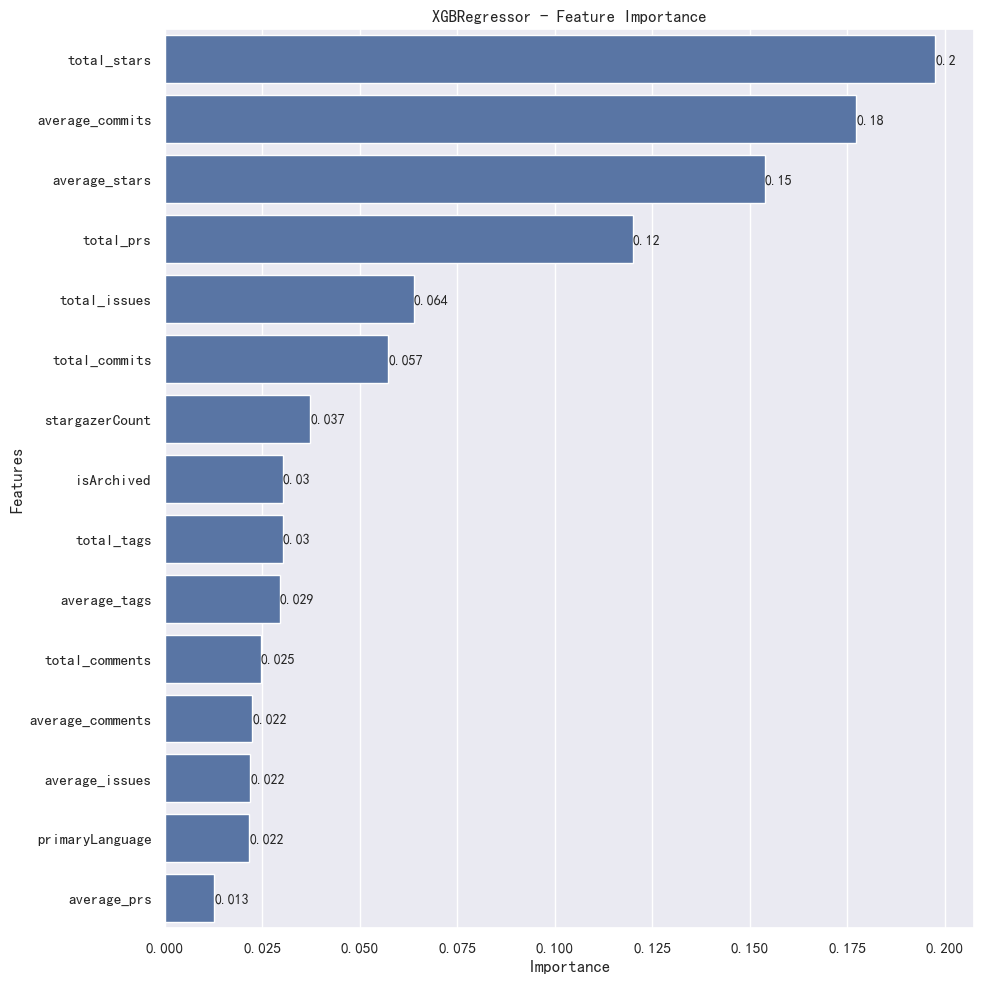

In [14]:
############# 横向条形图 - 特征重要性
def plot_feature_importance(model,features,top_n = None):
	# 提取出特征重要度
	importances = model.feature_importances_
	# 映射成字典
	imp_dict = {feature:importance for feature,importance in zip(features,importances)}
	# 排序
	imp_sorted = sorted(imp_dict.items(),key=lambda x:x[1],reverse=True)
	df_imp = pd.DataFrame(imp_sorted,
				columns=['Features','Importance'])
	df_imp = df_imp.head(top_n) if top_n!=None else df_imp

	# 画图
	plt.figure(figsize=(10,10))
	plt.title(f"{type(model).__name__} - Feature Importance")
	sns.barplot(data = df_imp,y='Features',x='Importance',orient='h')
	# 输出数值
	for i,j in zip(range(len(df_imp['Features'])),df_imp['Importance']):
			plt.text(j,i,'{:.2}'.format(j),va='center',ha='left',fontsize=10)
	plt.xticks(rotation=0)
	plt.tight_layout()
	plt.savefig(f"../images/feature_importance/{type(model).__name__} feature_importance.jpg",dpi=300)
	return df_imp

plot_feature_importance(models[2],features)

### 生存分析

能否通过代码仓库过去一段时间的历史活动数据及特征粗略预测项目在未来不同时间点发生弃用的风险概率?

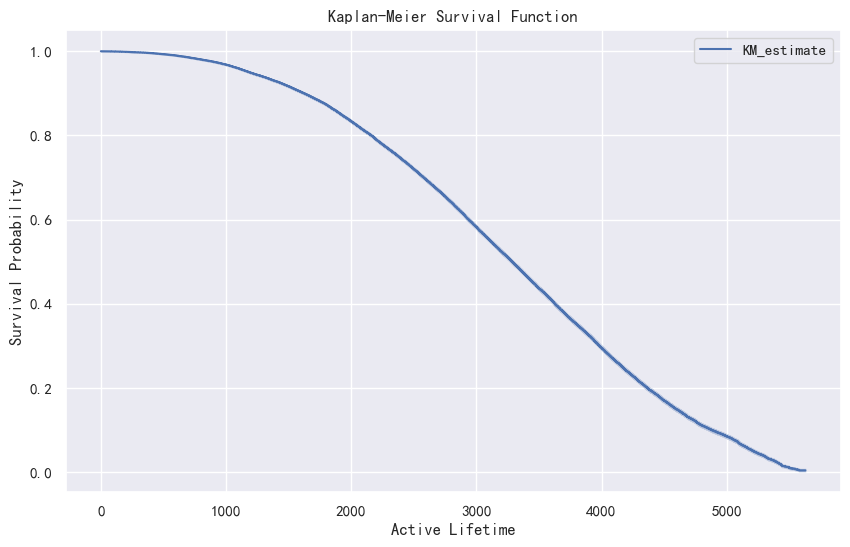

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from lifelines import CoxPHFitter
import matplotlib.pyplot as plt

# 保留原数据，创建一个标准化后的数据副本
df_standardized = df.copy()

# 提取需要标准化的数值特征
numeric_columns = ['stargazerCount', 'total_lifetime', 'total_commits', 
                   'total_issues', 'total_prs', 'total_stars', 'total_tags', 'total_comments',
                   'average_commits', 'average_issues', 'average_prs', 'average_stars', 
                   'average_tags', 'average_comments']

# 标准化这些特征
scaler = StandardScaler()
df_standardized[numeric_columns] = scaler.fit_transform(df_standardized[numeric_columns])


from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# 使用 Kaplan-Meier 模型进行拟合
kmf = KaplanMeierFitter()

# 拟合模型，使用 active_lifetime 作为时间，isArchived 作为事件
kmf.fit(df_standardized['active_lifetime'], event_observed=df_standardized['isArchived'])

# 绘制生存曲线
plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Function')
plt.xlabel('Active Lifetime')
plt.ylabel('Survival Probability')
plt.savefig('../images/prediction/survival function.png', dpi=300, format='png')
plt.show()

# Kaplan-Meier 模型的生存曲线：KM 模型生成的生存曲线展示了项目随着时间推移，仍然存续（未被弃用）的概率。通过这条曲线，你可以看到在未来不同时间点，项目“活着”的概率，从而预测其未来发生弃用的可能性。